In [440]:
# import all necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder



In [443]:
# Read the Excel file
df = pd.read_csv('C:\\Users\\KOFI ADUKPO\\Downloads\\Streamline_Delivery_Service.csv')



In [444]:
#check for the shape of data.
print(df.shape)
print(list(df.columns))

(7043, 17)
['customerID', 'gender', 'senior', 'family_plan', 'Dependents', 'customer_since', 'contact_preference', 'fraud_protection', 'order_backup', 'tech_support', 'streaming_movies', 'contract_type', 'paperless', 'payment_type', 'monthly_bill', 'total_billed', 'complaint']


In [445]:
# check for column information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   customerID          7043 non-null   object 
 1   gender              7043 non-null   object 
 2   senior              7043 non-null   int64  
 3   family_plan         7043 non-null   object 
 4   Dependents          7043 non-null   object 
 5   customer_since      7043 non-null   int64  
 6   contact_preference  7043 non-null   object 
 7   fraud_protection    7043 non-null   object 
 8   order_backup        7043 non-null   object 
 9   tech_support        7043 non-null   object 
 10  streaming_movies    7043 non-null   object 
 11  contract_type       7043 non-null   object 
 12  paperless           7043 non-null   object 
 13  payment_type        7043 non-null   object 
 14  monthly_bill        7043 non-null   float64
 15  total_billed        7043 non-null   object 
 16  compla

In [446]:
# Obtaining unique value counts for each column
for column in df.columns:
    counts = df[column].value_counts()
    print(f"Value counts for {column}:")
    print(counts)
    print()

Value counts for customerID:
0002-ORFBO    1
6616-AALSR    1
6625-UTXEW    1
6625-IUTTT    1
6625-FLENO    1
             ..
3352-RICWQ    1
3352-ALMCK    1
3351-NQLDI    1
3351-NGXYI    1
9995-HOTOH    1
Name: customerID, Length: 7043, dtype: int64

Value counts for gender:
Male      3555
Female    3488
Name: gender, dtype: int64

Value counts for senior:
0    5901
1    1142
Name: senior, dtype: int64

Value counts for family_plan:
No     3641
Yes    3402
Name: family_plan, dtype: int64

Value counts for Dependents:
No     4933
Yes    2110
Name: Dependents, dtype: int64

Value counts for customer_since:
1     613
72    362
2     238
3     200
4     176
     ... 
28     57
39     56
44     51
36     50
0      11
Name: customer_since, Length: 73, dtype: int64

Value counts for contact_preference:
Mobile    3096
Phone     2421
Email     1526
Name: contact_preference, dtype: int64

Value counts for fraud_protection:
No     5024
Yes    2019
Name: fraud_protection, dtype: int64

Value count

In [447]:
# checking for missing values
df.isnull().sum()

customerID            0
gender                0
senior                0
family_plan           0
Dependents            0
customer_since        0
contact_preference    0
fraud_protection      0
order_backup          0
tech_support          0
streaming_movies      0
contract_type         0
paperless             0
payment_type          0
monthly_bill          0
total_billed          0
complaint             0
dtype: int64

In [448]:
msno.bar(df)
plt.title('Missing Data Percentage')
plt.show()

In [449]:
# Generate the missing value heatmap using msno.heatmap()
msno.heatmap(df)

# Display the heatmap
plt.show()

c:\Users\KOFI ADUKPO\Desktop\code\tenv\lib\site-packages\seaborn\matrix.py:309: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set(xlim=(0, self.data.shape[1]), ylim=(0, self.data.shape[0]))
c:\Users\KOFI ADUKPO\Desktop\code\tenv\lib\site-packages\seaborn\matrix.py:309: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  ax.set(xlim=(0, self.data.shape[1]), ylim=(0, self.data.shape[0]))


In [407]:
# checking for duplicate
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
7038    False
7039    False
7040    False
7041    False
7042    False
Length: 7043, dtype: bool

In [408]:
categorical_columns = df.select_dtypes(include=['object', 'category'])

In [409]:
categorical_columns.shape

(7043, 14)

In [410]:
continues_columns = df.select_dtypes(include=['float', 'int64'])

In [411]:
continues_columns.columns


Index(['senior', 'customer_since', 'monthly_bill'], dtype='object')

In [413]:
df['customer_since'].describe()

count    7043.000000
mean       32.371149
std        24.559481
min         0.000000
25%         9.000000
50%        29.000000
75%        55.000000
max        72.000000
Name: customer_since, dtype: float64

In [371]:
df['senior'].value_counts()

0    5901
1    1142
Name: senior, dtype: int64

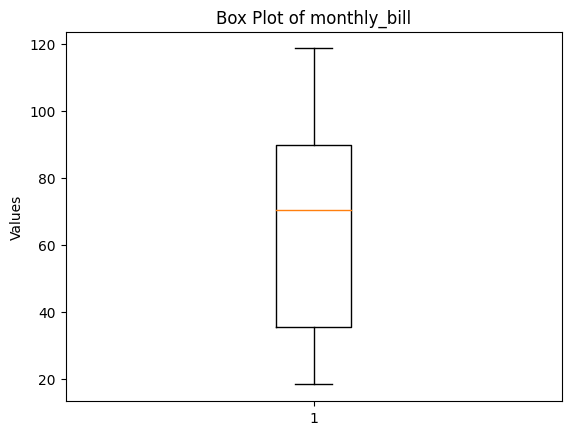

In [372]:
# Create a box plot
plt.boxplot(df['monthly_bill'])
plt.title('Box Plot of monthly_bill')
plt.ylabel('Values')
plt.show()

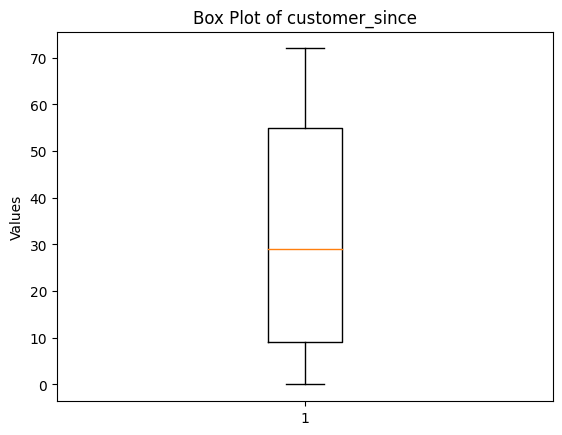

In [373]:
# Create a box plot for customer_since
plt.boxplot(df['customer_since'])
plt.title('Box Plot of customer_since')
plt.ylabel('Values')
plt.show()

In [374]:
continues_columns['monthly_bill']

0       65.60
1       59.90
2       73.90
3       98.00
4       83.90
        ...  
7038    55.15
7039    85.10
7040    50.30
7041    67.85
7042    59.00
Name: monthly_bill, Length: 7043, dtype: float64

In [375]:
continues_columns['monthly_bill'] = np.log(continues_columns['monthly_bill'])

In [376]:
continues_columns['monthly_bill']

0       4.183576
1       4.092677
2       4.302713
3       4.584967
4       4.429626
          ...   
7038    4.010057
7039    4.443827
7040    3.918005
7041    4.217299
7042    4.077537
Name: monthly_bill, Length: 7043, dtype: float64

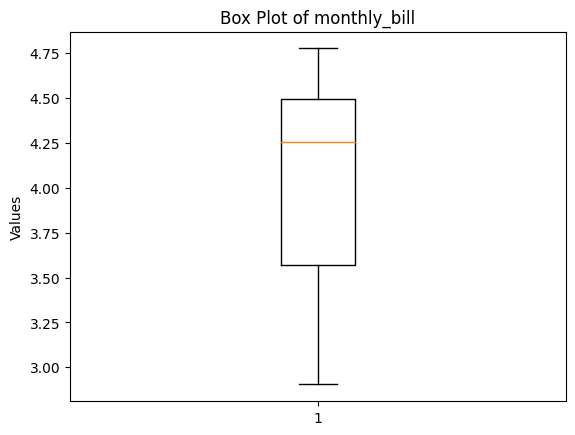

In [377]:
# Create a box plot
plt.boxplot(continues_columns['monthly_bill'])
plt.title('Box Plot of monthly_bill')
plt.ylabel('Values')
plt.show()

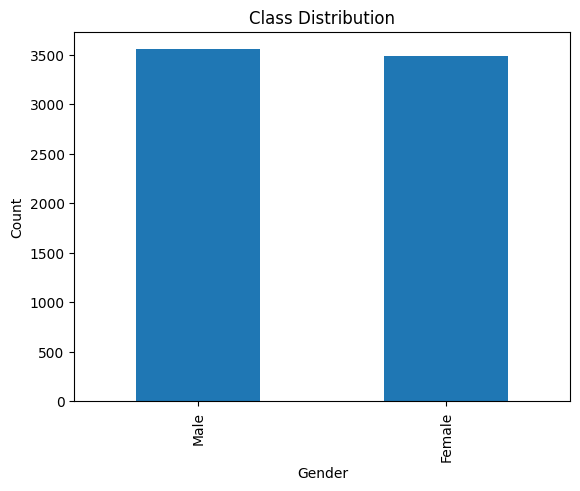

In [378]:
# Count the number of samples in each class
class_counts = df['gender'].value_counts()

# Plot the class distribution
class_counts.plot(kind='bar')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Class Distribution')
plt.show()

In [379]:
bins = [0, 24, 48, 72]
labels = ['long', 'longer', 'longest']
# keep copy of original df
df_1 = df.copy()

# Group integer columns into categories
df['customer_since'] = pd.cut(df['customer_since'], bins=bins, labels=labels)

In [380]:
df['total_billed'].describe()

count     7043
unique    6531
top           
freq        11
Name: total_billed, dtype: object

In [381]:
# dropping rows with empty string cells in 'total_billed'
df = df[df['total_billed'] != ' ']

In [382]:
df['total_billed'] = df['total_billed'].astype(float)
df['gender'] = df['gender'].astype(object)

In [383]:
df['total_billed'].describe()

count    7032.000000
mean     2283.300441
std      2266.771362
min        18.800000
25%       401.450000
50%      1397.475000
75%      3794.737500
max      8684.800000
Name: total_billed, dtype: float64

In [384]:
bins = [18, 52, 86, 120]
labels = ['high', 'higher', 'highest']
df['monthly_bill'] = pd.cut(df['monthly_bill'], bins=bins, labels=labels)

In [385]:
bins = [18, 2907, 5796, 8685]
labels = ['high', 'higher', 'highest']
df['total_billed'] = pd.cut(df['total_billed'], bins=bins, labels=labels)

In [386]:
(df.select_dtypes(include=['object', 'category'])).columns

Index(['customerID', 'gender', 'family_plan', 'Dependents', 'customer_since',
       'contact_preference', 'fraud_protection', 'order_backup',
       'tech_support', 'streaming_movies', 'contract_type', 'paperless',
       'payment_type', 'monthly_bill', 'total_billed', 'complaint'],
      dtype='object')

In [387]:
# convert column type to object
df['senior'] = df['senior'].astype(object)

In [388]:
(df.select_dtypes(include=['object', 'category'])).shape

(7032, 17)

In [389]:
# Initialize LabelEncoder
le = LabelEncoder()

# Apply label encoding to each column
for column in df.columns:
    df[column] = le.fit_transform(df[column])

In [390]:
df

,customerID,gender,senior,family_plan,Dependents,customer_since,contact_preference,fraud_protection,order_backup,tech_support,streaming_movies,contract_type,paperless,payment_type,monthly_bill,total_billed,complaint
0,0,0,0,1,1,0,2,0,1,1,0,1,1,1,1,0,0
1,1,1,0,0,0,0,2,0,0,0,1,0,0,1,1,0,0
2,2,1,0,0,0,0,1,0,0,0,0,0,1,1,1,0,1
3,3,1,1,1,0,0,1,0,1,0,1,0,1,1,2,0,1
4,4,0,1,1,0,0,1,0,0,1,0,0,1,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,7027,0,0,0,0,0,2,1,0,1,0,1,0,1,1,0,0
7039,7028,1,0,1,0,0,1,0,0,0,1,0,1,1,1,0,1
7040,7029,1,0,0,0,0,2,0,1,0,0,0,1,1,0,0,0
7041,7030,1,0,1,1,2,2,1,0,1,1,2,0,1,1,1,0


In [391]:
# Extract the feature columns (X) and target column (y)
X = df.drop(columns=['complaint','customerID'])
y = df['complaint']

In [392]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [393]:
# Print the shapes of the training and testing sets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (5625, 15)
X_test shape: (1407, 15)
y_train shape: (5625,)
y_test shape: (1407,)


In [394]:
X.columns

Index(['gender', 'senior', 'family_plan', 'Dependents', 'customer_since',
       'contact_preference', 'fraud_protection', 'order_backup',
       'tech_support', 'streaming_movies', 'contract_type', 'paperless',
       'payment_type', 'monthly_bill', 'total_billed'],
      dtype='object')

In [395]:
k = 5  # Number of neighbors to consider
knn = KNeighborsClassifier(n_neighbors=k)


In [396]:
X_train.columns

Index(['gender', 'senior', 'family_plan', 'Dependents', 'customer_since',
       'contact_preference', 'fraud_protection', 'order_backup',
       'tech_support', 'streaming_movies', 'contract_type', 'paperless',
       'payment_type', 'monthly_bill', 'total_billed'],
      dtype='object')

In [397]:
# train madel
knn.fit(X_train, y_train)


KNeighborsClassifier()

In [398]:
# make predictions
y_pred = knn.predict(X_test)


In [399]:
# evaluate model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.7583511016346838


In [432]:
from docx import Document
doc = Document()

In [437]:
code = """
# import all necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

# Read the Excel file
df = pd.read_csv('C:\\Users\\KOFI ADUKPO\\Downloads\\Streamline_Delivery_Service.csv')

#check for the shape of data.
df.shape
(7043, 17)

# check for column information
df.info()
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   customerID          7043 non-null   object 
 1   gender              7043 non-null   object 
 2   senior              7043 non-null   int64  
 3   family_plan         7043 non-null   object 
 4   Dependents          7043 non-null   object 
 5   customer_since      7043 non-null   int64  
 6   contact_preference  7043 non-null   object 
 7   fraud_protection    7043 non-null   object 
 8   order_backup        7043 non-null   object 
 9   tech_support        7043 non-null   object 
 10  streaming_movies    7043 non-null   object 
 11  contract_type       7043 non-null   object 
 12  paperless           7043 non-null   object 
 13  payment_type        7043 non-null   object 
 14  monthly_bill        7043 non-null   float64
 15  total_billed        7043 non-null   object 
 16  complaint           7043 non-null   object 
dtypes: float64(1), int64(2), object(14)
memory usage: 935.5+ KB

# Obtaining unique value counts for each column
for column in df.columns:
    counts = df[column].value_counts()
    print(f"Value counts for {column}:")
    print(counts)
    print()
Value counts for customerID:
0002-ORFBO    1
6616-AALSR    1
6625-UTXEW    1
6625-IUTTT    1
6625-FLENO    1
             ..
3352-RICWQ    1
3352-ALMCK    1
3351-NQLDI    1
3351-NGXYI    1
9995-HOTOH    1
Name: customerID, Length: 7043, dtype: int64

Value counts for gender:
Male      3555
Female    3488
Name: gender, dtype: int64

Value counts for senior:
0    5901
1    1142
Name: senior, dtype: int64

Value counts for family_plan:
No     3641
Yes    3402
Name: family_plan, dtype: int64

Value counts for Dependents:
No     4933
Yes    2110
Name: Dependents, dtype: int64

Value counts for customer_since:
1     613
72    362
2     238
3     200
4     176
     ... 
28     57
39     56
44     51
36     50
0      11
Name: customer_since, Length: 73, dtype: int64

Value counts for contact_preference:
Mobile    3096
Phone     2421
Email     1526
Name: contact_preference, dtype: int64

Value counts for fraud_protection:
No     5024
Yes    2019
Name: fraud_protection, dtype: int64

Value counts for order_backup:
No     4614
Yes    2429
Name: order_backup, dtype: int64

Value counts for tech_support:
No     4999
Yes    2044
Name: tech_support, dtype: int64

Value counts for streaming_movies:
No     4311
Yes    2732
Name: streaming_movies, dtype: int64

Value counts for contract_type:
Month-to-month    3875
Two year          1695
One year          1473
Name: contract_type, dtype: int64

Value counts for paperless:
Yes    4171
No     2872
Name: paperless, dtype: int64

Value counts for payment_type:
Credit card (automatic)      5499
Bank transfer (automatic)    1544
Name: payment_type, dtype: int64

Value counts for monthly_bill:
20.05     61
19.85     45
19.95     44
19.90     44
20.00     43
          ..
116.55     1
106.85     1
68.55      1
108.80     1
67.85      1
Name: monthly_bill, Length: 1585, dtype: int64

Value counts for total_billed:
           11
20.2       11
19.75       9
19.9        8
20.05       8
           ..
2387.75     1
6302.8      1
2058.5      1
829.55      1
3707.6      1
Name: total_billed, Length: 6531, dtype: int64

Value counts for complaint:
No     5174
Yes    1869
Name: complaint, dtype: int64

# checking for missing values
df.isnull().sum()
customerID            0
gender                0
senior                0
family_plan           0
Dependents            0
customer_since        0
contact_preference    0
fraud_protection      0
order_backup          0
tech_support          0
streaming_movies      0
contract_type         0
paperless             0
payment_type          0
monthly_bill          0
total_billed          0
complaint             0
dtype: int64

msno.bar(df)
plt.title('Missing Data Percentage')
plt.show()

# checking for duplicate
df.duplicated()
0       False
1       False
2       False
3       False
4       False
        ...  
7038    False
7039    False
7040    False
7041    False
7042    False
Length: 7043, dtype: bool

# Create a box plot for monthly bill
plt.boxplot(df['monthly_bill'])
plt.title('Box Plot of monthly_bill')
plt.ylabel('Values')
plt.show()

# Create a box plot for customer_since
plt.boxplot(df['customer_since'])
plt.title('Box Plot of customer_since')
plt.ylabel('Values')
plt.show()


# Plot the class distribution
class_counts.plot(kind='bar')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Class Distribution')
plt.show()

# dropping rows with empty string cells in 'total_billed'
df = df[df['total_billed'] != ' ']

bins = [0, 24, 48, 72]
labels = ['long', 'longer', 'longest']
# keep copy of original df
df_1 = df.copy()

# Group integer columns into categories
df['customer_since'] = pd.cut(df['customer_since'], bins=bins, labels=labels)

bins = [18, 52, 86, 120]
labels = ['high', 'higher', 'highest']
df['monthly_bill'] = pd.cut(df['monthly_bill'], bins=bins, labels=labels)

bins = [18, 2907, 5796, 8685]
labels = ['high', 'higher', 'highest']
df['total_billed'] = pd.cut(df['total_billed'], bins=bins, labels=labels)

# convert column type to object
df['senior'] = df['senior'].astype(object)

# Extract the feature columns (X) and target column (y)
X = df.drop(columns=['complaint','customerID'])
y = df['complaint']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shapes of the training and testing sets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)
X_train shape: (5625, 15)
X_test shape: (1407, 15)
y_train shape: (5625,)
y_test shape: (1407,)

k = 5  # Number of neighbors to consider
knn = KNeighborsClassifier(n_neighbors=k)

# train madel
knn.fit(X_train, y_train)

# make predictions
y_pred = knn.predict(X_test)

# evaluate model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
Accuracy: 0.7583511016346838


"""
doc.add_paragraph(code)


In [439]:
doc.save('davwork.docx')


In [1]:
import numpy as np
import pandas as pd

In [2]:
ti ="her as sower"

In [7]:
original_string = "thr"
replacements = {
    "sample": "new",
    "multiple": "different",
    "words": "terms"
}

# Replace each word in the dictionary with its corresponding replacement
for word, replacement in replacements.items():
    original_string = original_string.replace(word, replacement)

print(original_string)

SyntaxError: EOL while scanning string literal (2366242294.py, line 1)

'Hello, world! This is a new sentence.'